In [1]:
print("Week 4 Day 1")

Week 4 Day 1


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
                                

In [3]:
# Load dataset
data = pd.read_csv('../data/employees_data.csv')
df = pd.DataFrame(data)
df.head()

,Employee_ID,First_Name,Last_Name,Department,Salary,Join_Date,Age,City
0,1101,Max,Moore,Finance,64904,2015-01-31,49,Dallas
1,1102,Max,Doe,Operations,62488,2013-01-10,40,Los Angeles
2,1103,Lucas,Black,Finance,107951,2017-05-26,52,New York
3,1104,Charlie,Davis,Marketing,84243,2023-02-18,34,San Diego
4,1105,Lucas,Black,Marketing,102331,2018-12-05,36,Phoenix


In [4]:
df.loc[2, "Salary"] = 120000

In [5]:
df.loc[2]

Employee_ID          1103
First_Name          Lucas
Last_Name           Black
Department        Finance
Salary             120000
Join_Date      2017-05-26
Age                    52
City             New York
Name: 2, dtype: object

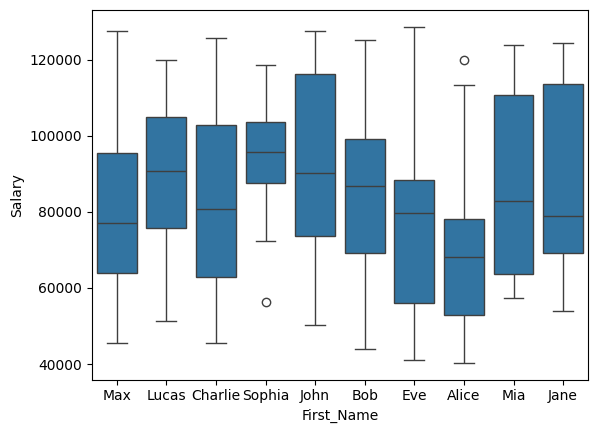

In [6]:
sns.boxplot(x="First_Name", y="Salary", data=df)
plt.show()

In [7]:
df[df.Salary > 128000]

,Employee_ID,First_Name,Last_Name,Department,Salary,Join_Date,Age,City
149,1250,Eve,Smith,Sales,128673,2012-02-11,36,New York


# EDA 

In [8]:
# Load dataset
data = pd.read_csv('../data/sales_data.csv')
df_sales = pd.DataFrame(data)
df_sales.head()

,Sale_ID,Product,Price,Quantity,Sale_Date,Store_Location,Customer_Age,Payment_Method
0,2101,Tablet,1651.20,63,2022-07-15,Store_C,34,Debit Card
1,2102,Smartphone,1324.22,59,2022-06-20,Store_C,57,Debit Card
2,2103,Smartphone,1362.49,5,2024-04-06,Store_C,40,Cash
3,2104,Keyboard,779.72,43,2023-08-23,Store_C,30,Credit Card
4,2105,Tablet,1427.63,18,2023-04-03,Store_E,65,Online Payment


In [9]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sale_ID         150 non-null    int64  
 1   Product         150 non-null    object 
 2   Price           150 non-null    float64
 3   Quantity        150 non-null    int64  
 4   Sale_Date       150 non-null    object 
 5   Store_Location  150 non-null    object 
 6   Customer_Age    150 non-null    int64  
 7   Payment_Method  150 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 9.5+ KB


In [10]:
df_stats = df_sales.describe()
df_stats

,Sale_ID,Price,Quantity,Customer_Age
count,150.000000,150.000000,150.00000,150.000000
mean,2175.500000,1216.615400,40.70000,46.953333
std,43.445368,680.347615,21.74432,17.916037
min,2101.000000,40.000000,1.00000,16.000000
25%,2138.250000,655.420000,22.00000,32.000000
50%,2175.500000,1230.020000,41.50000,47.000000
75%,2212.750000,1752.557500,60.00000,63.750000
max,2250.000000,2461.430000,74.00000,79.000000


In [11]:
mode_product = df_sales['Product'].mode()[0]
print(f"Most common category: {mode_product}")

Most common category: Headphones


In [12]:
df_sales.loc[12, 'Price'] = 4000
df_sales.loc[121, 'Price'] = 5500


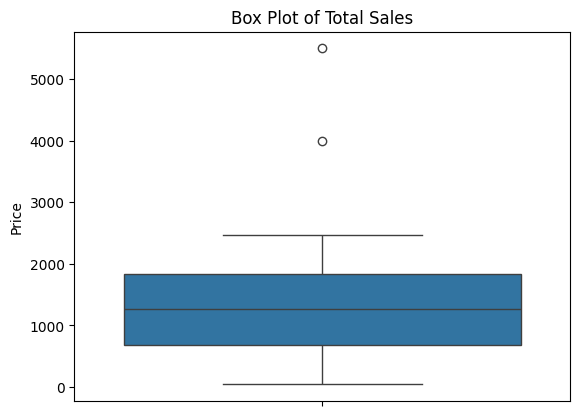

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y='Price', data=df_sales)
plt.title("Box Plot of Total Sales")
plt.show()

In [14]:
df_sales['Total_Sales'] = df_sales["Quantity"] * df_sales["Price"]
df_sales.head(5)

,Sale_ID,Product,Price,Quantity,Sale_Date,Store_Location,Customer_Age,Payment_Method,Total_Sales
0,2101,Tablet,1651.20,63,2022-07-15,Store_C,34,Debit Card,104025.60
1,2102,Smartphone,1324.22,59,2022-06-20,Store_C,57,Debit Card,78128.98
2,2103,Smartphone,1362.49,5,2024-04-06,Store_C,40,Cash,6812.45
3,2104,Keyboard,779.72,43,2023-08-23,Store_C,30,Credit Card,33527.96
4,2105,Tablet,1427.63,18,2023-04-03,Store_E,65,Online Payment,25697.34


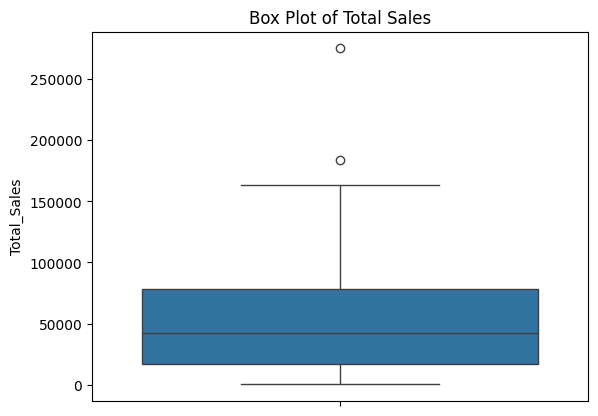

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y='Total_Sales', data=df_sales)
plt.title("Box Plot of Total Sales")
plt.show()

In [16]:
Q1 = df_sales['Total_Sales'].quantile(0.25)
Q3 = df_sales['Total_Sales'].quantile(0.75)
IQR = Q3 - Q1
outliers = df_sales[(df_sales['Total_Sales'] < Q1 - 1.5 * IQR) |
(df_sales['Total_Sales'] > Q3 + 1.5 * IQR)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 2


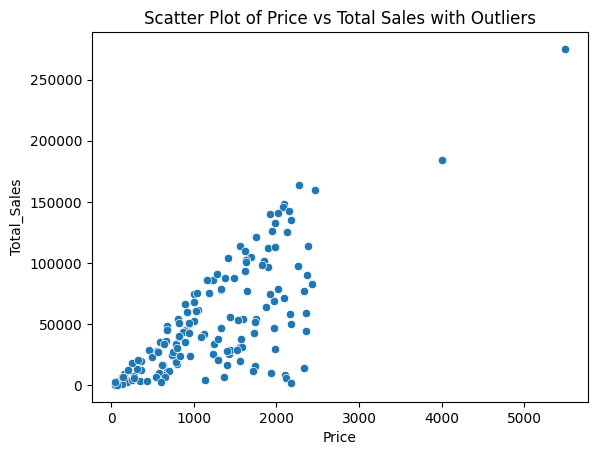

In [17]:
sns.scatterplot(x='Price', y='Total_Sales', data=df_sales)
plt.title("Scatter Plot of Price vs Total Sales with Outliers")
plt.show()

In [18]:
correlation = df_sales[['Price', 'Quantity', 'Total_Sales']].corr()
print(correlation)

                Price  Quantity  Total_Sales
Price        1.000000   0.07578     0.741539
Quantity     0.075780   1.00000     0.636840
Total_Sales  0.741539   0.63684     1.000000


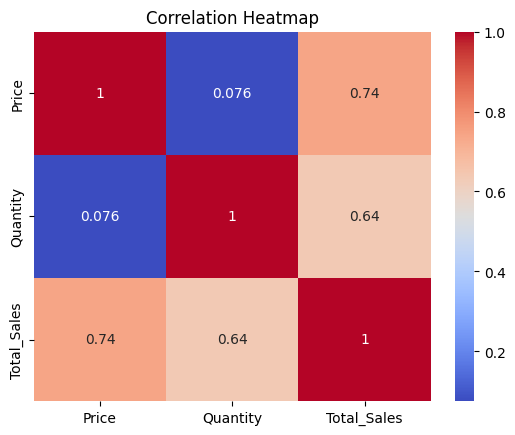

In [19]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

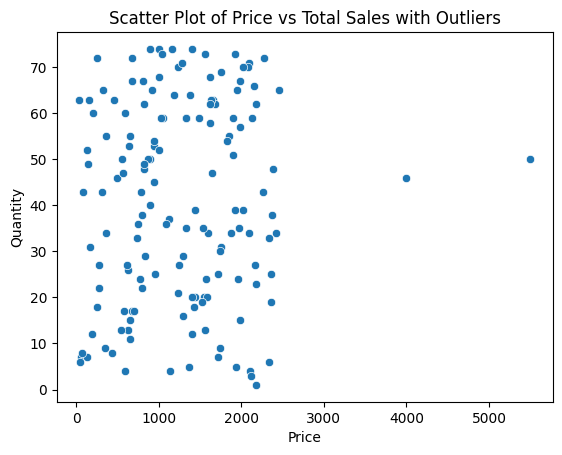

In [20]:
sns.scatterplot(x='Price', y='Quantity', data=df_sales)
plt.title("Scatter Plot of Price vs Total Sales with Outliers")
plt.show()

In [21]:
from scipy.stats import zscore
df_sales['z_score'] = zscore(df_sales['Total_Sales'])
outliers_z = df_sales[df_sales['z_score'].abs() > 3]
print(f"Number of outliers based on z-scores: {len(outliers_z)}")

Number of outliers based on z-scores: 1


In [25]:
df_sales['z_score'] = zscore(df_sales['Total_Sales'])
outliers_z = df_sales[df_sales['z_score'].abs() > 2]

print(f"Number of outliers based on z-scores: {len(outliers_z)}")
outliers_z

Number of outliers based on z-scores: 6


,Sale_ID,Product,Price,Quantity,Sale_Date,Store_Location,Customer_Age,Payment_Method,Total_Sales,z_score
5,2106,Keyboard,2089.43,71,2024-10-01,Store_C,68,Online Payment,148349.53,2.064964
12,2113,Laptop,4000.00,46,2022-09-16,Store_D,36,Debit Card,184000.00,2.838516
18,2119,Mouse,2078.59,70,2024-08-06,Store_C,54,Mobile Payment,145501.30,2.003163
70,2171,Mouse,2268.73,72,2024-06-12,Store_A,76,Online Payment,163348.56,2.390416
114,2215,Mouse,2461.43,65,2024-07-25,Store_C,37,Mobile Payment,159992.95,2.317606
121,2222,Monitor,5500.00,50,2022-09-05,Store_D,65,Cash,275000.00,4.813053


In [26]:
df_sales.head(3)

,Sale_ID,Product,Price,Quantity,Sale_Date,Store_Location,Customer_Age,Payment_Method,Total_Sales,z_score
0,2101,Tablet,1651.20,63,2022-07-15,Store_C,34,Debit Card,104025.60,1.103214
1,2102,Smartphone,1324.22,59,2022-06-20,Store_C,57,Debit Card,78128.98,0.541304
2,2103,Smartphone,1362.49,5,2024-04-06,Store_C,40,Cash,6812.45,-1.006137


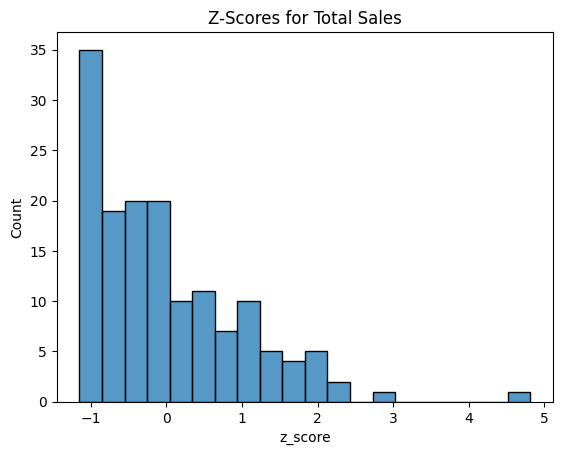

In [27]:
sns.histplot(df_sales['z_score'], bins=20)
plt.title("Z-Scores for Total Sales")
plt.show()

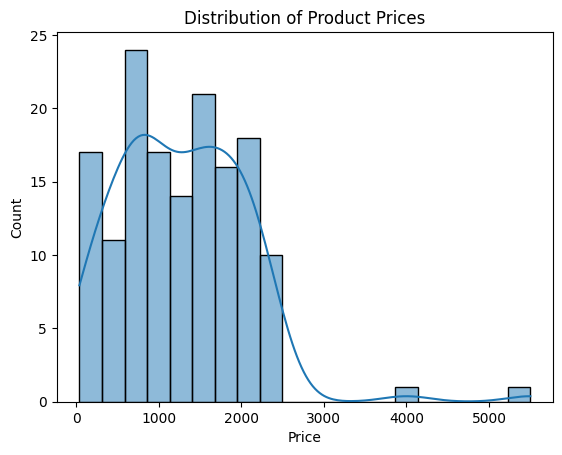

In [28]:
sns.histplot(df_sales['Price'], kde=True, bins=20)
plt.title("Distribution of Product Prices")
plt.show()